In [24]:
from src.read import read_csv
from src.models import (
    preprocess_normalize_data,
    train_evaluate_linear_regression,
    train_evaluate_polynomial_regression,
    zscore_normalize,
    train_evaluate_zscore_normalization,
    tune_linear_hyperparameters,
    tune_polynomial_hyperparameters,
    tune_zscore_hyperparameters, 
    train_evaluate_random_forest,
    tune_rf_hyperparameters
)
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
import pandas as pd

data = read_csv("data/train.csv")
x_train, y_train = preprocess_normalize_data(data=data, target_column="medv")
from src.vars import columns_to_ignore, overall_results
from src.utils import draw_scatter_plot, populate_overall_results

Linear Regression:

TRAIN SET:
MSE: 95.020594374152
RMSE: 9.747850756661798
MAE: 7.472201918416783

TEST SET:
MSE: 83.1742328626622
RMSE: 9.119990836764158
MAE: 7.39788188177937


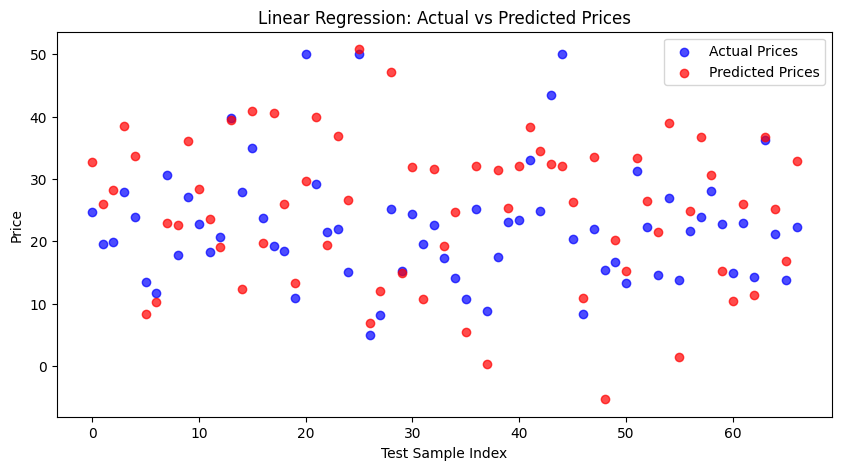

In [25]:
print("Linear Regression:")
sgdr, X_test, y_test, y_test_pred, results = train_evaluate_linear_regression(
    x_train, y_train,
)
overall_results = populate_overall_results(0, results, overall_results)
indices = np.arange(len(y_test))
draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Linear Regression: Actual vs Predicted Prices")

Polynomial Regression:

TRAIN SET:
MSE: 15.134606102479392
RMSE: 3.8903221078053924
MAE: 2.757639550657668

TEST SET:
MSE: 12.676028409620884
RMSE: 3.5603410524303545
MAE: 2.6247798327309426


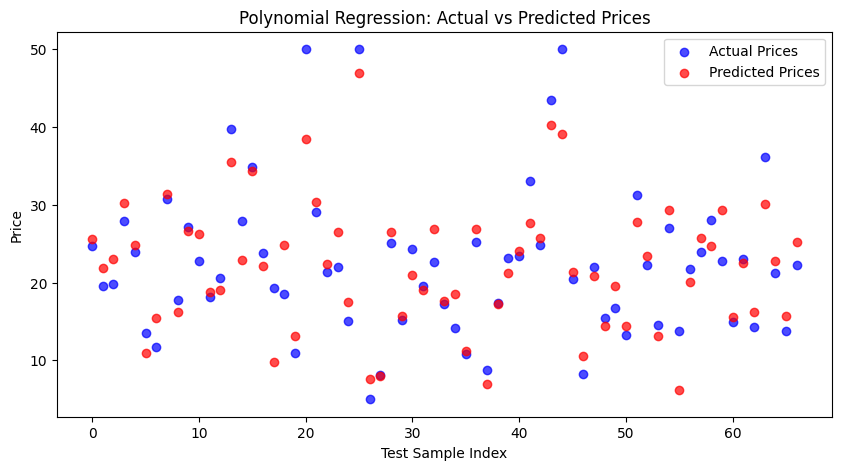

In [26]:
print("Polynomial Regression:")
sgdr, X_test, y_test, y_test_pred, results = train_evaluate_polynomial_regression(x_train, y_train)
overall_results = populate_overall_results(1, results, overall_results)
indices = np.arange(len(y_test))
draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Polynomial Regression: Actual vs Predicted Prices")

Z-Score Normalization:

TRAIN SET:
MSE: 25.123668978805018
RMSE: 5.012351641575541
MAE: 3.4926616752407083

TEST SET:
MSE: 19.266994635825622
RMSE: 4.389418484927773
MAE: 3.291505655921683


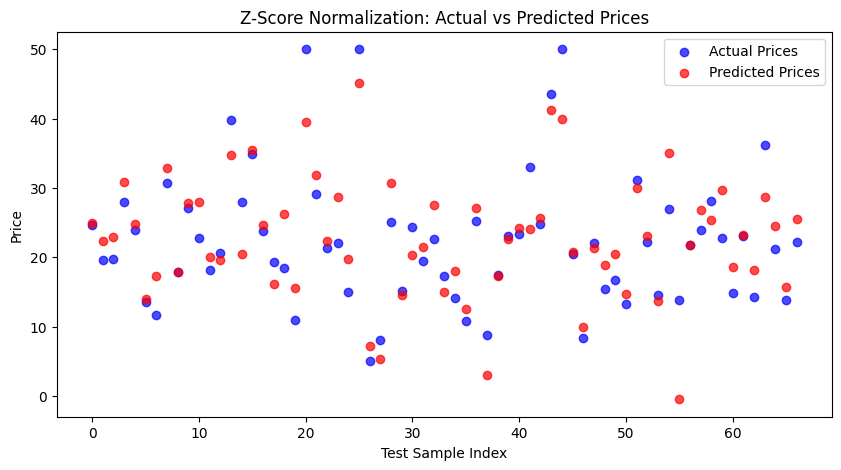

In [27]:
x_norm, mean, sigma = zscore_normalize(x_train)
print("Z-Score Normalization:")
sgdr, X_test, y_test, y_test_pred, results = train_evaluate_zscore_normalization(x_norm, y_train)
overall_results = populate_overall_results(2, results, overall_results)
draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Z-Score Normalization: Actual vs Predicted Prices")

Random Forest Model:

TRAIN SET:
MSE: 1.7834638834586454
RMSE: 1.3354639206877306
MAE: 0.9211541353383453

TEST SET:
MSE: 8.115971761194029
RMSE: 2.8488544647268363
MAE: 2.110746268656716


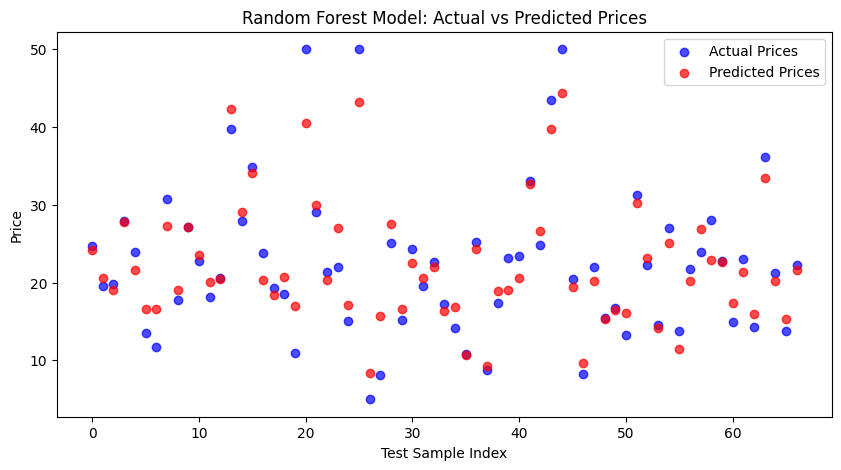

In [28]:
print("Random Forest Model:")
rf, X_test, y_test, y_test_pred, results = train_evaluate_random_forest(x_train, y_train)
overall_results = populate_overall_results(3, results, overall_results)
draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Random Forest Model: Actual vs Predicted Prices")

# After Hyperparameter tuning

Linear regression

TRAIN SET:
MSE: 95.020594374152
RMSE: 9.747850756661798
MAE: 7.472201918416783

TEST SET:
MSE: 83.1742328626622
RMSE: 9.119990836764158
MAE: 7.39788188177937


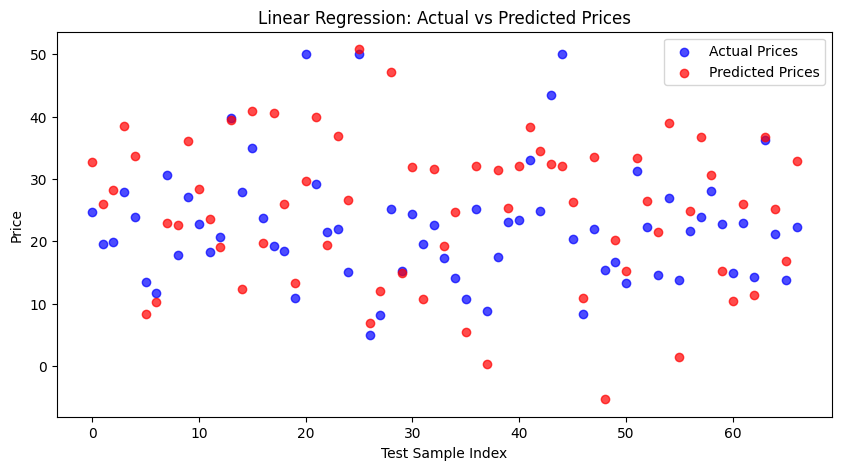

Polynomial regression

TRAIN SET:
MSE: 15.134606102479392
RMSE: 3.8903221078053924
MAE: 2.757639550657668

TEST SET:
MSE: 12.676028409620884
RMSE: 3.5603410524303545
MAE: 2.6247798327309426


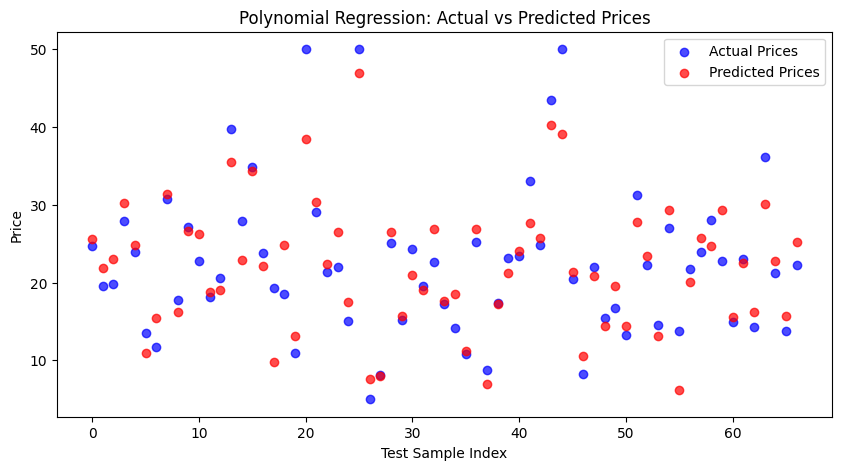

Z-Score Normalization

TRAIN SET:
MSE: 25.392212975546787
RMSE: 5.039068661523356
MAE: 3.456225718437401

TEST SET:
MSE: 25.50746815042674
RMSE: 5.050491872127579
MAE: 3.821725778810755


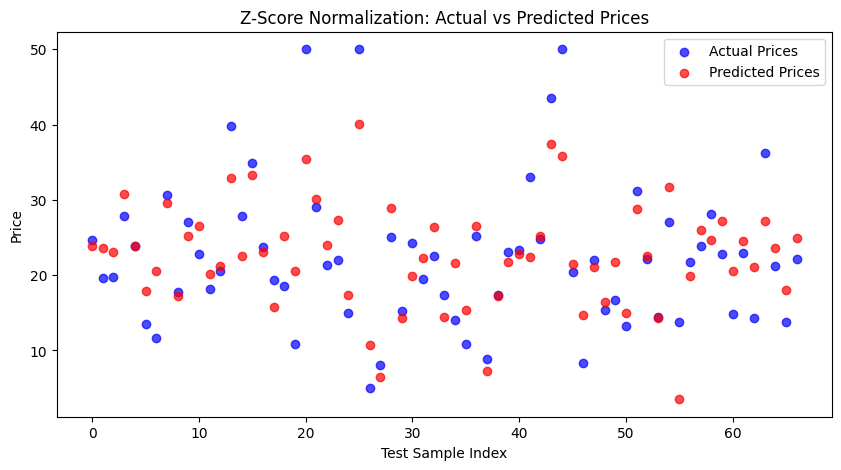

Random Forest Hyperparameter Tuning:

TRAIN SET:
MSE: 3.4861056802500574
RMSE: 1.8671115875196258
MAE: 1.3982490444340738

TEST SET:
MSE: 7.583358394306505
RMSE: 2.7537898239165792
MAE: 2.0940991258561024


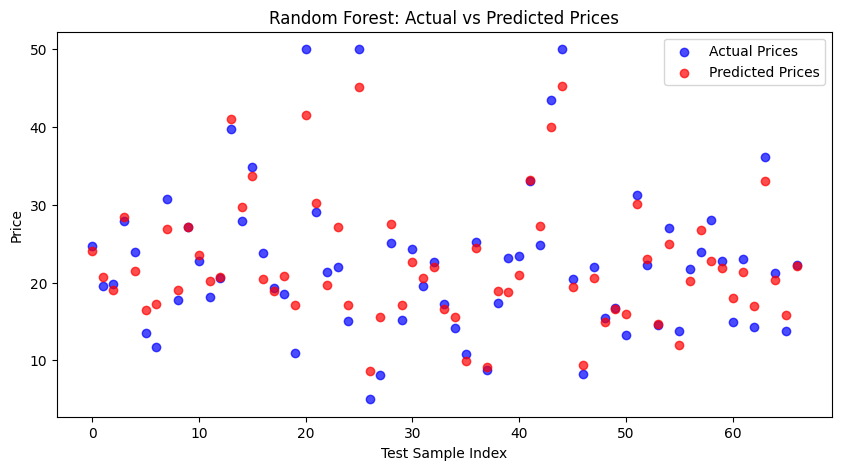

In [29]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
def hyperparameter_tuning(x, y, index, feature_mode="normal", overall_results=overall_results):
    label = " with less features" if feature_mode == "less" else ""
    suffix = "_less_features" if feature_mode == "less" else ""
    
    linear_params = tune_linear_hyperparameters(x, y)
    print("Linear regression")
    model_name = f"linear_regression{suffix}"
    sgdr, X_test, y_test, y_test_pred, results = train_evaluate_linear_regression(
        x, y, params=linear_params, model_name=model_name
    )
    overall_results = populate_overall_results(index, results, overall_results)
    index += 1
    indices = np.arange(len(y_test))
    draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", f"Linear Regression{label}: Actual vs Predicted Prices")

    print("Polynomial regression")
    polynomial_best_params = tune_polynomial_hyperparameters(x, y, suffix=suffix)
    model_name = f"polynomial_regression{suffix}"
    sgdr, X_test, y_test, y_test_pred, results = train_evaluate_polynomial_regression(
        x, y, params=polynomial_best_params, model_name=model_name
    )
    overall_results = populate_overall_results(index, results, overall_results)
    index += 1
    draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", f"Polynomial Regression{label}: Actual vs Predicted Prices")

    print("Z-Score Normalization")
    zscore_best_params = tune_zscore_hyperparameters(x, y,suffix=suffix)
    model_name = f"zscore_normalization{suffix}"
    x_norm, mean, sigma = zscore_normalize(x)
    sgdr, X_test, y_test, y_test_pred, results = train_evaluate_zscore_normalization(
        x_norm, y, params=zscore_best_params, model_name=model_name
    )
    overall_results = populate_overall_results(index, results, overall_results)
    index += 1
    draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", f"Z-Score Normalization{label}: Actual vs Predicted Prices")

    print("Random Forest Hyperparameter Tuning:")
    rf_best_params = tune_rf_hyperparameters(x, y, suffix=suffix)
    model_name = f"random_forest{suffix}"
    sgdr, X_test, y_test, y_test_pred, results = train_evaluate_random_forest(
        x, y, params=rf_best_params, model_name=model_name
    )
    overall_results = populate_overall_results(index, results, overall_results)
    index += 1
    draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", f"Random Forest{label}: Actual vs Predicted Prices")
    return index
index = 0
index = hyperparameter_tuning(x_train, y_train, index, feature_mode="normal", overall_results=overall_results)

Linear Regression with less features:

TRAIN SET:
MSE: 112.06383496108188
RMSE: 10.586020733074438
MAE: 9.281530302929319

TEST SET:
MSE: 123.8148117708927
RMSE: 11.127210421794526
MAE: 9.637511627927976


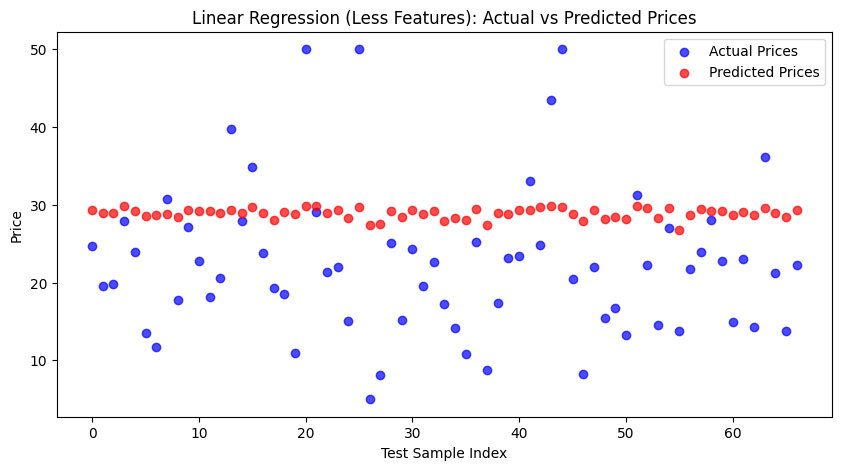

In [30]:
print("Linear Regression with less features:")
_x_train, _y_train = preprocess_normalize_data(data=data, target_column="medv", columns_to_ignore=columns_to_ignore)
sgdr, X_test, y_test, y_test_pred, results = train_evaluate_linear_regression(_x_train, _y_train, model_name='linear_regression_less_features')
overall_results = populate_overall_results(4, results, overall_results)

indices = np.arange(len(y_test))
draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Linear Regression (Less Features): Actual vs Predicted Prices")

Polynomial Regression with less features:

TRAIN SET:
MSE: 16.177346428643865
RMSE: 4.022107212475056
MAE: 2.8219226155316455

TEST SET:
MSE: 13.919269304418126
RMSE: 3.7308536964638703
MAE: 2.8037553571185705


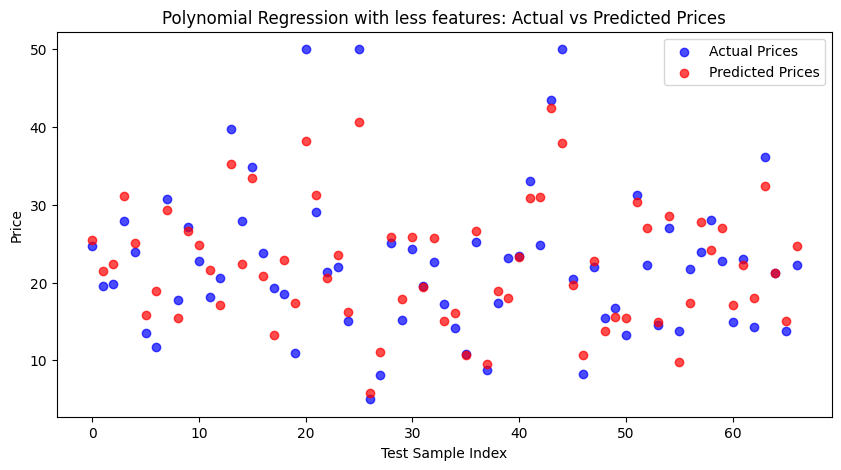

In [31]:
print("Polynomial Regression with less features:")
sgdr, X_test, y_test, y_test_pred, results = train_evaluate_polynomial_regression(_x_train, _y_train, model_name='polynomial_less_features')
overall_results = populate_overall_results(5, results, overall_results)

indices = np.arange(len(y_test))
draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Polynomial Regression with less features: Actual vs Predicted Prices")

Z-Score Normalization with less features:

TRAIN SET:
MSE: 42.97817654660522
RMSE: 6.555774290395088
MAE: 4.381135719553071

TEST SET:
MSE: 45.52601952459387
RMSE: 6.747297201442506
MAE: 4.516574976831817


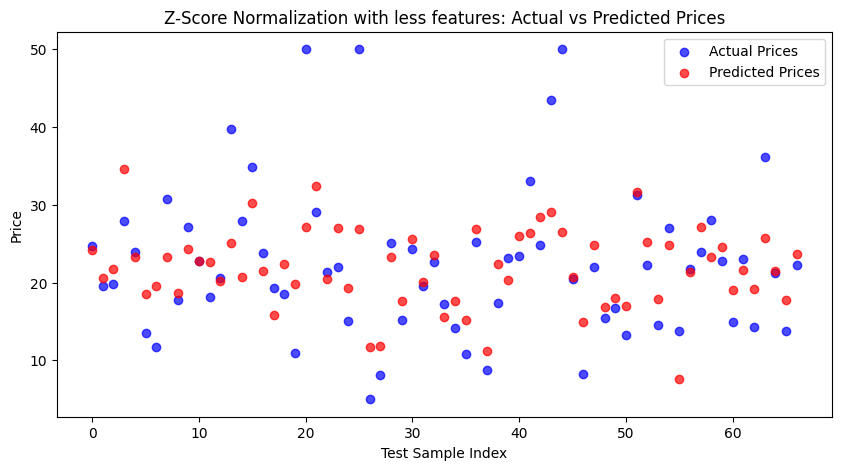

In [32]:
x_norm, mean, sigma = zscore_normalize(_x_train)
print("Z-Score Normalization with less features:")
sgdr, X_test, y_test, y_test_pred, results = train_evaluate_zscore_normalization(x_norm, _y_train, model_name='zscale_normalized_less_features')
overall_results = populate_overall_results(6, results, overall_results)
draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Z-Score Normalization with less features: Actual vs Predicted Prices")

Random Forest Model:

TRAIN SET:
MSE: 1.7834638834586454
RMSE: 1.3354639206877306
MAE: 0.9211541353383453

TEST SET:
MSE: 8.115971761194029
RMSE: 2.8488544647268363
MAE: 2.110746268656716


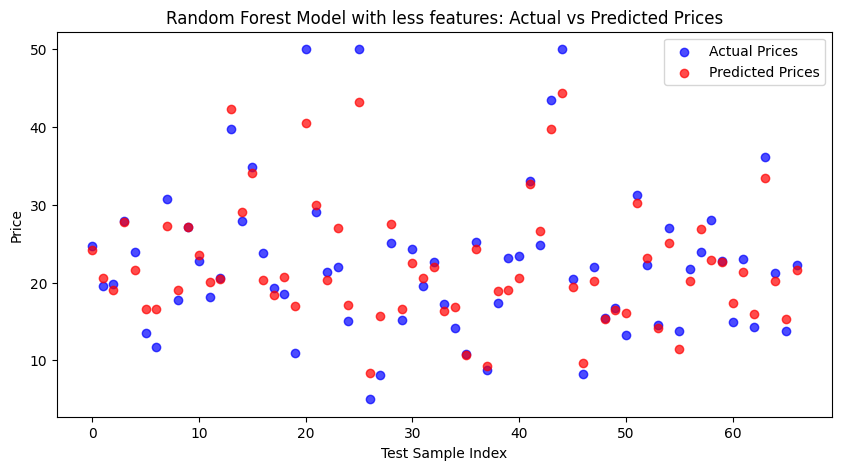

In [33]:
print("Random Forest Model:")
rf, X_test, y_test, y_test_pred, results = train_evaluate_random_forest(x_train, y_train, params={}, model_name='random_forest_less_features')
overall_results = populate_overall_results(7, results, overall_results)
draw_scatter_plot(indices, y_test, y_test_pred, "Test Sample Index", "Price", "Random Forest Model with less features: Actual vs Predicted Prices")

Linear regression

TRAIN SET:
MSE: 112.06383496108188
RMSE: 10.586020733074438
MAE: 9.281530302929319

TEST SET:
MSE: 123.8148117708927
RMSE: 11.127210421794526
MAE: 9.637511627927976


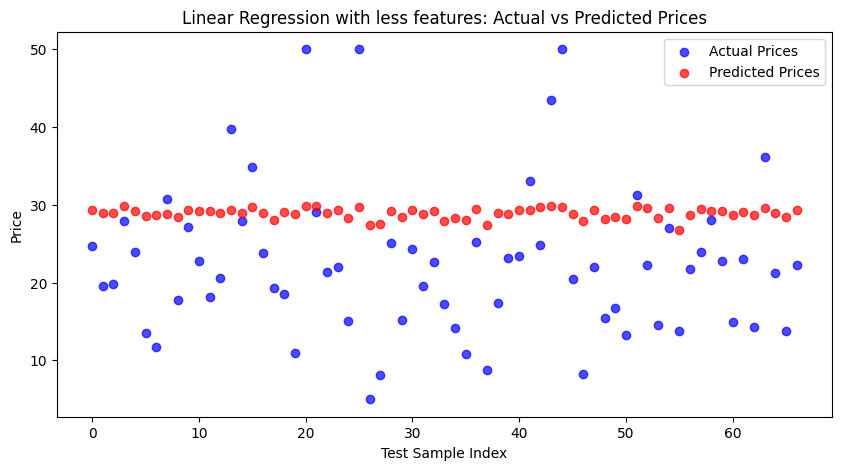

Polynomial regression

TRAIN SET:
MSE: 15.869004198979537
RMSE: 3.9835918715374867
MAE: 2.7466930348179845

TEST SET:
MSE: 9.820880110121
RMSE: 3.1338283472648913
MAE: 2.4636587805777954


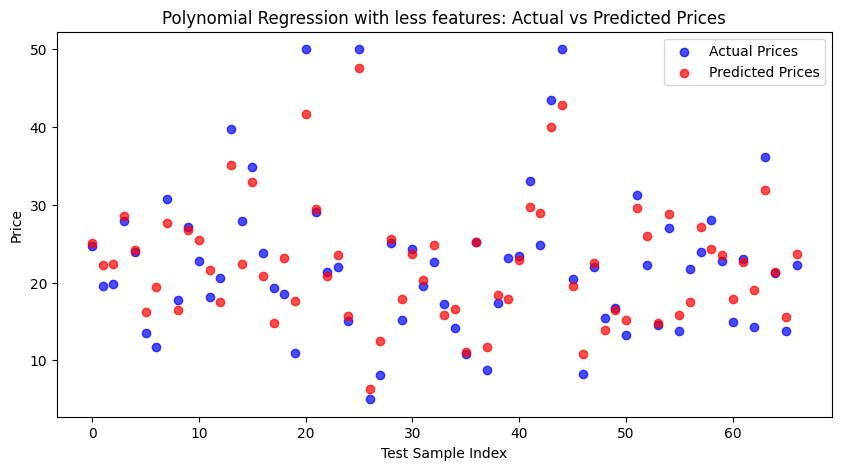

Z-Score Normalization

TRAIN SET:
MSE: 68.46294293393339
RMSE: 8.27423367653666
MAE: 6.47266676647629

TEST SET:
MSE: 65.9553693980272
RMSE: 8.12129111644369
MAE: 5.986832921547952


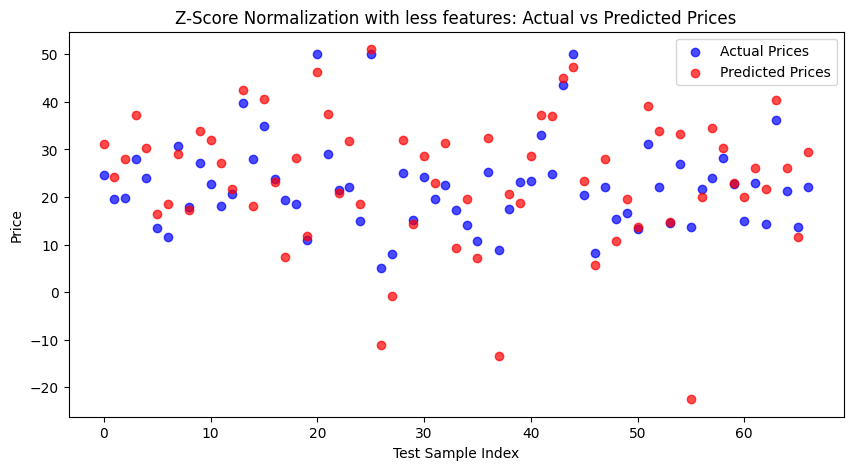

Random Forest Hyperparameter Tuning:

TRAIN SET:
MSE: 4.158452870512188
RMSE: 2.039228498847588
MAE: 1.416429615313184

TEST SET:
MSE: 8.3640739398114
RMSE: 2.8920708739260523
MAE: 2.1776913866207877


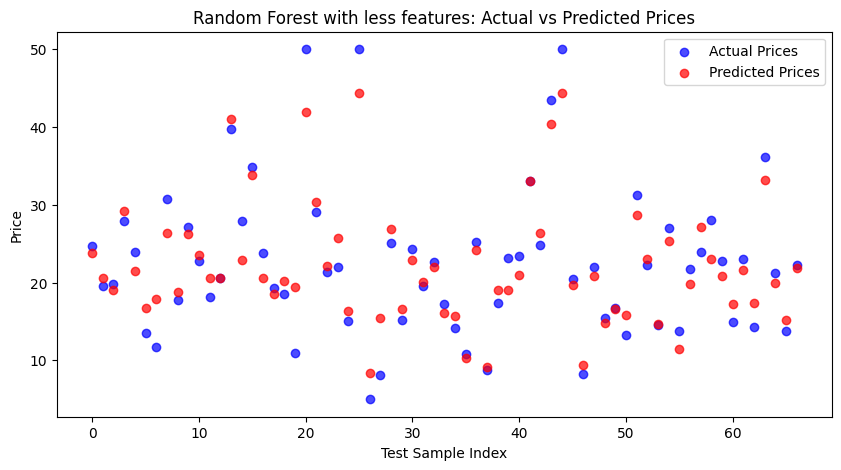

In [34]:
index = hyperparameter_tuning(_x_train, _y_train, index, feature_mode="less")

In [35]:
display(HTML("<h3>Overall Model Results</h3>"))
metric_html = """
<h3>Metric Descriptions</h3>
<ul>
  <li><b>MSE (Mean Squared Error):</b> The average of the squared differences between predicted and actual values. Lower is better.</li>
  <li><b>RMSE (Root Mean Squared Error):</b> The square root of MSE. It is in the same units as the target variable and easier to interpret.</li>
  <li><b>MAE (Mean Absolute Error):</b> The average of the absolute differences between predicted and actual values. Lower is better.</li>
  <li><b>Before:</b> Metric on the training set.</li>
  <li><b>After:</b> Metric on the test set (unseen data).</li>
</ul>
"""

display(HTML(metric_html))
df = pd.DataFrame(overall_results)
display(df)

,Model,MSE Before,MSE After,RMSE Before,RMSE After,MAE Before,MAE After
0,Linear,95.020594,83.174233,9.747851,9.119991,7.472202,7.397882
1,Polynomial,15.134606,12.676028,3.890322,3.560341,2.757640,2.624780
2,Z-Score,25.392213,25.507468,5.039069,5.050492,3.456226,3.821726
3,Random Forest,3.486106,7.583358,1.867112,2.753790,1.398249,2.094099
4,Linear Regression (Less Features),112.063835,123.814812,10.586021,11.127210,9.281530,9.637512
5,Polynomial (Less Features),15.869004,9.820880,3.983592,3.133828,2.746693,2.463659
6,Z-Score (Less Features),68.462943,65.955369,8.274234,8.121291,6.472667,5.986833
7,Random Forest (Less Features),4.158453,8.364074,2.039228,2.892071,1.416430,2.177691


## Overall Model Performance Summary

After evaluating multiple regression models (Linear, Polynomial, Z-Score Normalization, and Random Forest) on both the full feature set and a reduced feature set, the following conclusions were observed:

- **Random Forest** consistently delivers the lowest error metrics (MSE, RMSE, MAE) on both training and test sets, making it the most robust and accurate model for this dataset.
- **Linear and Polynomial Regression** models show higher errors, especially when fewer features are used, indicating greater sensitivity to feature selection and a tendency to underfit or overfit.
- **Z-Score Normalization** standardizes features but does not significantly outperform other models by itself.
- **Feature reduction** generally increases error for all models, but Random Forest is least affected, demonstrating its resilience to changes in feature set.

**Recommendation:**  
For best predictive performance, use Random Forest. Linear and Polynomial models may be useful for interpretability but are less reliable for prediction in this context.